<a href="https://colab.research.google.com/github/ZIADEA/Fundamental/blob/main/PCA_reduction_de_dimension_TP1_DJERI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Appliquons la reduction de dimension sur le data lending_club_loan_two.csv

In [ ]:
# importation des bibliotheque
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## exploration du data

structure du data

In [ ]:
df=pd.read_csv("/content/lending_club_loan_two.csv")
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  ...  \
0                Marketing  10+ years           RENT    117000.0  ...   
1          Credit analyst     4 years       MORTGAGE     65000.0  ...   
2             Statistician   < 1 year           RENT     43057.0  ...   
3          Client Advocate    6 years           RENT     54000.0  ...   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0  ...   

  open_acc pub_rec revol_bal revol_util total_acc  initial_list_status  \
0     16.0     0.0   36369.0       41.8      25.0                    w   
1     17.0     0.0   20131.0       53.3      27.0                    f   
2     13.0     0.0   11987.0       92.2      26.0                    f   
3      6.0     0.0    5472.0       21.5      13.0                    f   
4     13.0     0.0   24584.0       69.8      43.0                    f   

  application_type  mort_acc  pub_rec_bankruptcies  \
0       INDIVIDUAL       0.0                   0.0   
1       INDIVIDUAL       3.0                   0.0   
2       INDIVIDUAL       0.0                   0.0   
3       INDIVIDUAL       0.0                   0.0   
4       INDIVIDUAL       1.0                   0.0   

                                           address  
0     0174 Michelle Gateway\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113  
3            823 Reid Ford\nDelacruzside, MA 00813  
4             679 Luna Roads\nGreggshire, VA 11650  

[5 rows x 27 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49840 entries, 0 to 49839
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             49840 non-null  float64
 1   term                  49840 non-null  object 
 2   int_rate              49840 non-null  float64
 3   installment           49840 non-null  float64
 4   grade                 49840 non-null  object 
 5   sub_grade             49840 non-null  object 
 6   emp_title             46995 non-null  object 
 7   emp_length            47559 non-null  object 
 8   home_ownership        49840 non-null  object 
 9   annual_inc            49840 non-null  float64
 10  verification_status   49840 non-null  object 
 11  issue_d               49840 non-null  object 
 12  loan_status           49840 non-null  object 
 13  purpose               49840 non-null  object 
 14  title                 49647 non-null  object 
 15  dti                

In [ ]:
df.describe()

loan_amnt      int_rate   installment    annual_inc           dti  \
count  49840.000000  49840.000000  49840.000000  4.984000e+04  49839.000000   
mean   14104.343399     13.655891    431.382488  7.417359e+04     17.371272   
std     8363.652294      4.461130    250.346140  5.771454e+04      8.194942   
min      500.000000      5.320000     16.310000  2.500000e+03      0.000000   
25%     8000.000000     10.490000    250.330000  4.500000e+04     11.280000   
50%    12000.000000     13.330000    375.490000  6.347400e+04     16.870000   
75%    20000.000000     16.550000    566.140000  9.000000e+04     22.990000   
max    40000.000000     30.740000   1533.810000  6.100000e+06    189.900000   

           open_acc       pub_rec      revol_bal    revol_util     total_acc  \
count  49839.000000  49839.000000   49839.000000  49810.000000  49839.000000   
mean      11.320673      0.179879   15814.501675     53.808500     25.458978   
std        5.115291      0.510777   19600.621787     24.388978     11.866976   
min        0.000000      0.000000       0.000000      0.000000      2.000000   
25%        8.000000      0.000000    6048.500000     35.900000     17.000000   
50%       10.000000      0.000000   11145.000000     54.900000     24.000000   
75%       14.000000      0.000000   19540.000000     72.900000     32.000000   
max       51.000000     11.000000  617838.000000    129.400000    111.000000   

           mort_acc  pub_rec_bankruptcies  
count  45170.000000          49777.000000  
mean       1.809830              0.122928  
std        2.140034              0.358541  
min        0.000000              0.000000  
25%        0.000000              0.000000  
50%        1.000000              0.000000  
75%        3.000000              0.000000  
max       34.000000              6.000000

## gestion des données manquantes

In [ ]:
print('nombre de ligne     :',df.shape[0])
missing_values=df.isnull().sum()
print(missing_values)

nombre de ligne     : 396030
loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64


le valeur manquantes dans les colonnes son insinifiante devant le nombre de ligne donc il est preferable de les remplacer plutot que de supprimer ces colonnes

In [ ]:
categorical_features=df.select_dtypes(include=['object']).columns

numerical_values= df.select_dtypes(include=['float64']).columns


In [ ]:
# remplacer les valeurs manquante
from sklearn.impute import SimpleImputer
impute1 = SimpleImputer(strategy= 'median')
impute2 = SimpleImputer(strategy='most_frequent')
df[numerical_values]=impute1.fit_transform(df[numerical_values])
df[categorical_features]=impute2.fit_transform(df[categorical_features])


In [ ]:
# verification
print('nombre de ligne     :',df.shape[0])
missing_values1=df.isnull().sum()
print(missing_values1)

nombre de ligne     : 49840
loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64


## encodage des variables caregorielles

In [ ]:
for col in categorical_features:
  print(f'valeurs prise la par variable {col} : ')
  print(df[col].unique())
  print('--'*40)


valeurs prise la par variable term : 
[' 36 months' ' 60 months']
--------------------------------------------------------------------------------
valeurs prise la par variable grade : 
['B' 'A' 'C' 'E' 'D' 'F' 'G']
--------------------------------------------------------------------------------
valeurs prise la par variable sub_grade : 
['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']
--------------------------------------------------------------------------------
valeurs prise la par variable emp_title : 
['Marketing' 'Credit analyst ' 'Statistician' ...
 "Michael's Arts & Crafts" 'licensed bankere' 'Gracon Services, Inc']
--------------------------------------------------------------------------------
valeurs prise la par variable emp_length : 
['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year

In [ ]:
from sklearn.preprocessing import LabelEncoder , OrdinalEncoder ,OneHotEncoder


In [ ]:
# variable term   on va garder la valeur numerique
df['term'] = df['term'].str.replace(' months', '').astype(float)

In [ ]:
print(df['term'])

0       36.0
1       36.0
2       36.0
3       36.0
4       60.0
        ... 
4153    36.0
4154    60.0
4155    36.0
4156    36.0
4157    36.0
Name: term, Length: 4158, dtype: float64


In [ ]:
#variable grade  on va utiliser le Ordinal Encoder
ordinalencoder_grade=OrdinalEncoder()
df['grade']=ordinalencoder_grade.fit_transform(df[['grade']])

In [ ]:
print(df['grade'])

0         1.0
1         1.0
2         1.0
3         0.0
4         2.0
         ... 
396025    1.0
396026    2.0
396027    1.0
396028    2.0
396029    2.0
Name: grade, Length: 396030, dtype: float64


In [ ]:
# variable sub_grade  on va juste garder la partie numerique la partie lettre est representer par la colonne grade
df['sub_grade'] = df['sub_grade'].str[1].astype(float)


In [ ]:
print(df['sub_grade'])

0         4.0
1         5.0
2         3.0
3         2.0
4         5.0
         ... 
396025    4.0
396026    1.0
396027    1.0
396028    2.0
396029    2.0
Name: sub_grade, Length: 396030, dtype: float64


In [ ]:
#variable emp_title on va utiliser le Label Encoder
labelencoder_emp_title=LabelEncoder()
df['emp_title']=labelencoder_emp_title.fit_transform(df['emp_title'])

In [ ]:
print(df['emp_title'])

0          80956
1          33317
2         127182
3          27760
4          38300
           ...  
396025    160365
396026      5779
396027     26146
396028     56712
396029     66737
Name: emp_title, Length: 396030, dtype: int64


In [ ]:
#variable emp_length
def modif(column):
  dict={}
  vect=df['emp_length'].unique()
  for i in vect:
    if i == '10+ years' :
      dict[i]= 10
    elif i == '< 1 year' :
        dict[i]= 0
    else :
      dict[i]=float(i[0])
  return dict

df['emp_length']=df['emp_length'].map(modif(df['emp_length']))


In [ ]:
print(df['emp_length'])

0         10.0
1          4.0
2          0.0
3          6.0
4          9.0
          ... 
396025     2.0
396026     5.0
396027    10.0
396028    10.0
396029    10.0
Name: emp_length, Length: 396030, dtype: float64


In [ ]:
#variable home_ownership  on va utiliser le One Hot Encoder
onehotencoder_home_ownership=OneHotEncoder(sparse_output=False)
newcols_home_ownership=onehotencoder_home_ownership.fit_transform(df[['home_ownership']])
df[onehotencoder_home_ownership.get_feature_names_out(['home_ownership'])]=newcols_home_ownership
df=df.drop(columns=['home_ownership'])

In [ ]:
print(df[onehotencoder_home_ownership.get_feature_names_out(['home_ownership'])])

        home_ownership_ANY  home_ownership_MORTGAGE  home_ownership_NONE  \
0                      0.0                      0.0                  0.0   
1                      0.0                      1.0                  0.0   
2                      0.0                      0.0                  0.0   
3                      0.0                      0.0                  0.0   
4                      0.0                      1.0                  0.0   
...                    ...                      ...                  ...   
396025                 0.0                      0.0                  0.0   
396026                 0.0                      1.0                  0.0   
396027                 0.0                      0.0                  0.0   
396028                 0.0                      1.0                  0.0   
396029                 0.0                      0.0                  0.0   

        home_ownership_OTHER  home_ownership_OWN  home_ownership_RENT  
0              

In [ ]:
#variable verification_status on va utiliser le One Hot Encoder
onehotencoder_verification_status=OneHotEncoder(sparse_output=False)
newcols_verification_status=onehotencoder_verification_status.fit_transform(df[['verification_status']])
df[onehotencoder_verification_status.get_feature_names_out(['verification_status'])]=newcols_verification_status

df=df.drop(columns=["verification_status"])


In [ ]:
#variable issue_d  on va separer l annee et le moi
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month

df=df.drop(columns=["issue_d"])


In [ ]:
print(df['issue_year'],df['issue_month'])

0         2015
1         2015
2         2015
3         2014
4         2013
          ... 
396025    2015
396026    2015
396027    2013
396028    2012
396029    2010
Name: issue_year, Length: 396030, dtype: int32 0          1
1          1
2          1
3         11
4          4
          ..
396025    10
396026     2
396027    10
396028     8
396029     6
Name: issue_month, Length: 396030, dtype: int32


In [ ]:
# variable loan_status on va transformer en donne binnaire 0 pour 'Charged Off' et 1 pour 'Fully Paid'
repdict={ 'Charged Off':0,
         'Fully Paid':1
    }
df['loan_status']=df['loan_status'].map(repdict)


In [ ]:
print(df['loan_status'])

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_status, Length: 396030, dtype: int64


In [ ]:
#variable purpose on va utiliser le label Encoder
labelencoder_purpose=LabelEncoder()
df['purpose']=labelencoder_purpose.fit_transform(df['purpose'])


In [ ]:
print(df['purpose'])

0         12
1          2
2          1
3          1
4          1
          ..
396025     2
396026     2
396027     2
396028     2
396029     2
Name: purpose, Length: 396030, dtype: int64


In [ ]:
# # valeurs prise la par variable title on va utiliser le One Hot Encoder
# onehotencoder_title=OneHotEncoder(sparse_output=False)
# newcols_title=onehotencoder_title.fit_transform(df[['title']])
# df[onehotencoder_title.get_feature_names_out(['title'])]=newcols_title

# df.drop(columns=["title"])
## ca marche pas a cause de la RAM :(


# valeurs prise la par variable title on va utiliser le label Encoder
labelencoder_title=LabelEncoder()
df['title']=labelencoder_purpose.fit_transform(df['title'])



In [ ]:
print(df['title'])

0         36960
1         12926
2         10159
3         10159
4          9268
          ...  
396025    12926
396026    12926
396027    45963
396028    23304
396029    36383
Name: title, Length: 396030, dtype: int64


In [ ]:
# valeurs prise la par variable earliest_cr_line  on va separer l annee et le moi
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
df['earliest_cr_line_month'] = df['earliest_cr_line'].dt.month
df=df.drop(columns=["earliest_cr_line"])

In [ ]:
print(df['earliest_cr_line_year'],df['earliest_cr_line_month'])

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 396030, dtype: datetime64[ns]


In [ ]:
# variable  variable initial_list_status on va transformer en donne binnaire 0 pour 'f' et 1 pour 'w'
repdict={ 'f':0,
         'w':1
    }
df['initial_list_status']=df['initial_list_status'].map(repdict)

In [ ]:
print(df['initial_list_status'])

0         1
1         0
2         0
3         0
4         0
         ..
396025    1
396026    0
396027    0
396028    0
396029    0
Name: initial_list_status, Length: 396030, dtype: int64


In [ ]:
# valeurs prise la par variable application_type on va utiliser le One Hot Encoder
onehotencoder_application_type=OneHotEncoder(sparse_output=False)
newcols_application_type=onehotencoder_application_type.fit_transform(df[['application_type']])
df[onehotencoder_application_type.get_feature_names_out(['application_type'])]=newcols_application_type

df=df.drop(columns=["application_type"])


In [ ]:
# valeurs prise la par variable address
# df['address']=df['address'].str[:-5].astype(int)
df['address']=df['address'].str.extract(r'(\d{5})').astype(int)

In [ ]:
print(df['address'])

0       22690
1        5113
2       87025
3         813
4       11650
        ...  
8308     5113
8309    22690
8310    96293
8311    22690
8312    70466
Name: address, Length: 8313, dtype: int64


verification

In [ ]:
df.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_title  \
0    10000.0    36     11.44       329.48    1.0          4      80956   
1     8000.0    36     11.99       265.68    1.0          5      33317   
2    15600.0    36     10.49       506.97    1.0          3     127182   
3     7200.0    36      6.49       220.65    0.0          2      27760   
4    24375.0    60     17.27       609.33    2.0          5      38300   

   emp_length home_ownership  annual_inc  ...  \
0        10.0           RENT    117000.0  ...   
1         4.0       MORTGAGE     65000.0  ...   
2         NaN           RENT     43057.0  ...   
3         NaN           RENT     54000.0  ...   
4         NaN       MORTGAGE     55000.0  ...   

  verification_status_Not Verified verification_status_Source Verified  \
0                              1.0                                 0.0   
1                              1.0                                 0.0   
2                              0.0                                 1.0   
3                              1.0                                 0.0   
4                              0.0                                 0.0   

   verification_status_Verified  issue_year  issue_month  \
0                           0.0        2015            1   
1                           0.0        2015            1   
2                           0.0        2015            1   
3                           0.0        2014           11   
4                           1.0        2013            4   

   earliest_cr_line_year earliest_cr_line_month  application_type_DIRECT_PAY  \
0                   1990                      6                          0.0   
1                   2004                      7                          0.0   
2                   2007                      8                          0.0   
3                   2006                      9                          0.0   
4                   1999                      3                          0.0   

   application_type_INDIVIDUAL  application_type_JOINT  
0                          1.0                     0.0  
1                          1.0                     0.0  
2                          1.0                     0.0  
3                          1.0                     0.0  
4                          1.0                     0.0  

[5 rows x 43 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 38 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            396030 non-null  float64
 1   term                                 396030 non-null  float64
 2   int_rate                             396030 non-null  float64
 3   installment                          396030 non-null  float64
 4   grade                                396030 non-null  float64
 5   sub_grade                            396030 non-null  float64
 6   emp_title                            396030 non-null  int64  
 7   emp_length                           396030 non-null  float64
 8   annual_inc                           396030 non-null  float64
 9   loan_status                          396030 non-null  int64  
 10  purpose                              396030 non-null  int64  
 11  title        

## convertir toute les valeur en float car on va appliquer un PCA manuelle

In [ ]:
# df_f=df.astype(np.float64)
df_f=df.astype(np.float64)
print(len(df_f))

396030


## visualisation avant standardisation et gestion des outliers

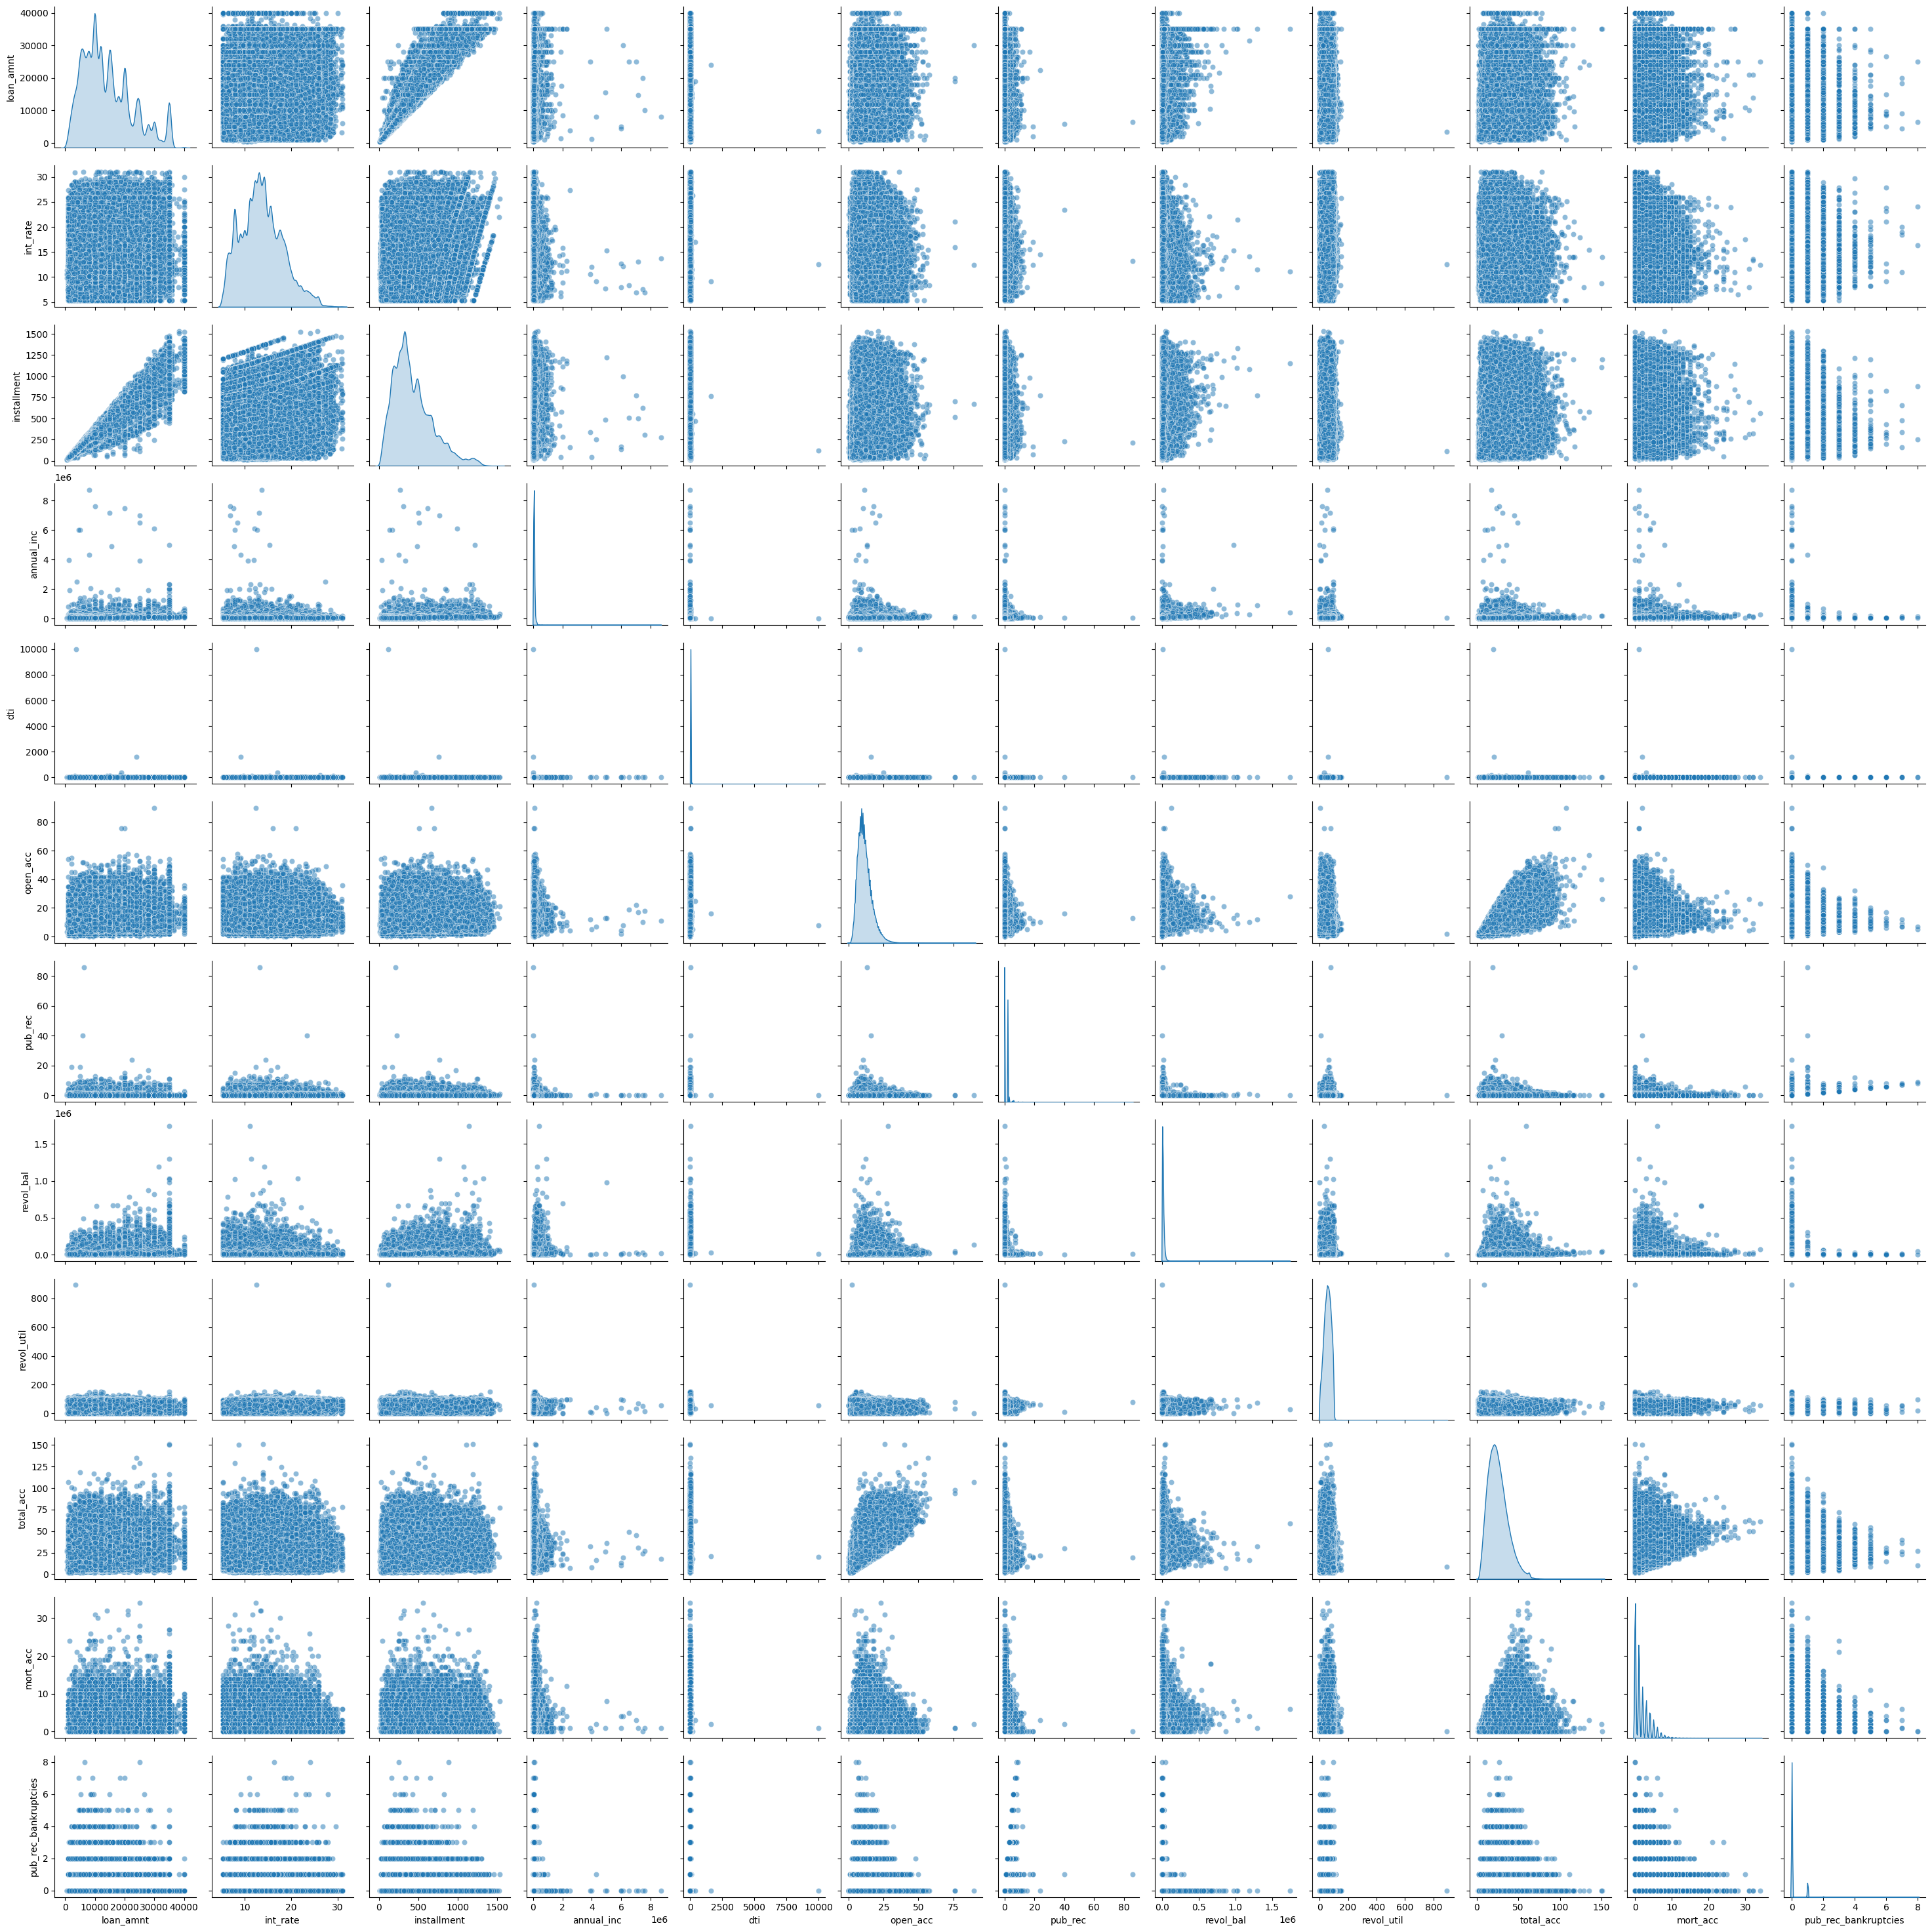

In [ ]:
sns.pairplot(df_f[numerical_values], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

il auait été preferable de selectionner les variabes a plotté car le nombre de variabes et eleve

## detecter et gerer les outliers

on va passer cette etape en supposant que le data est sans outliers meme si ce n est pas le cas

## standardisation

In [ ]:
from sklearn.preprocessing import  StandardScaler

In [ ]:
scaler=StandardScaler()
df_standardised=pd.DataFrame(scaler.fit_transform(df_f),columns=df_f.columns)

## visualisation apres standardisation

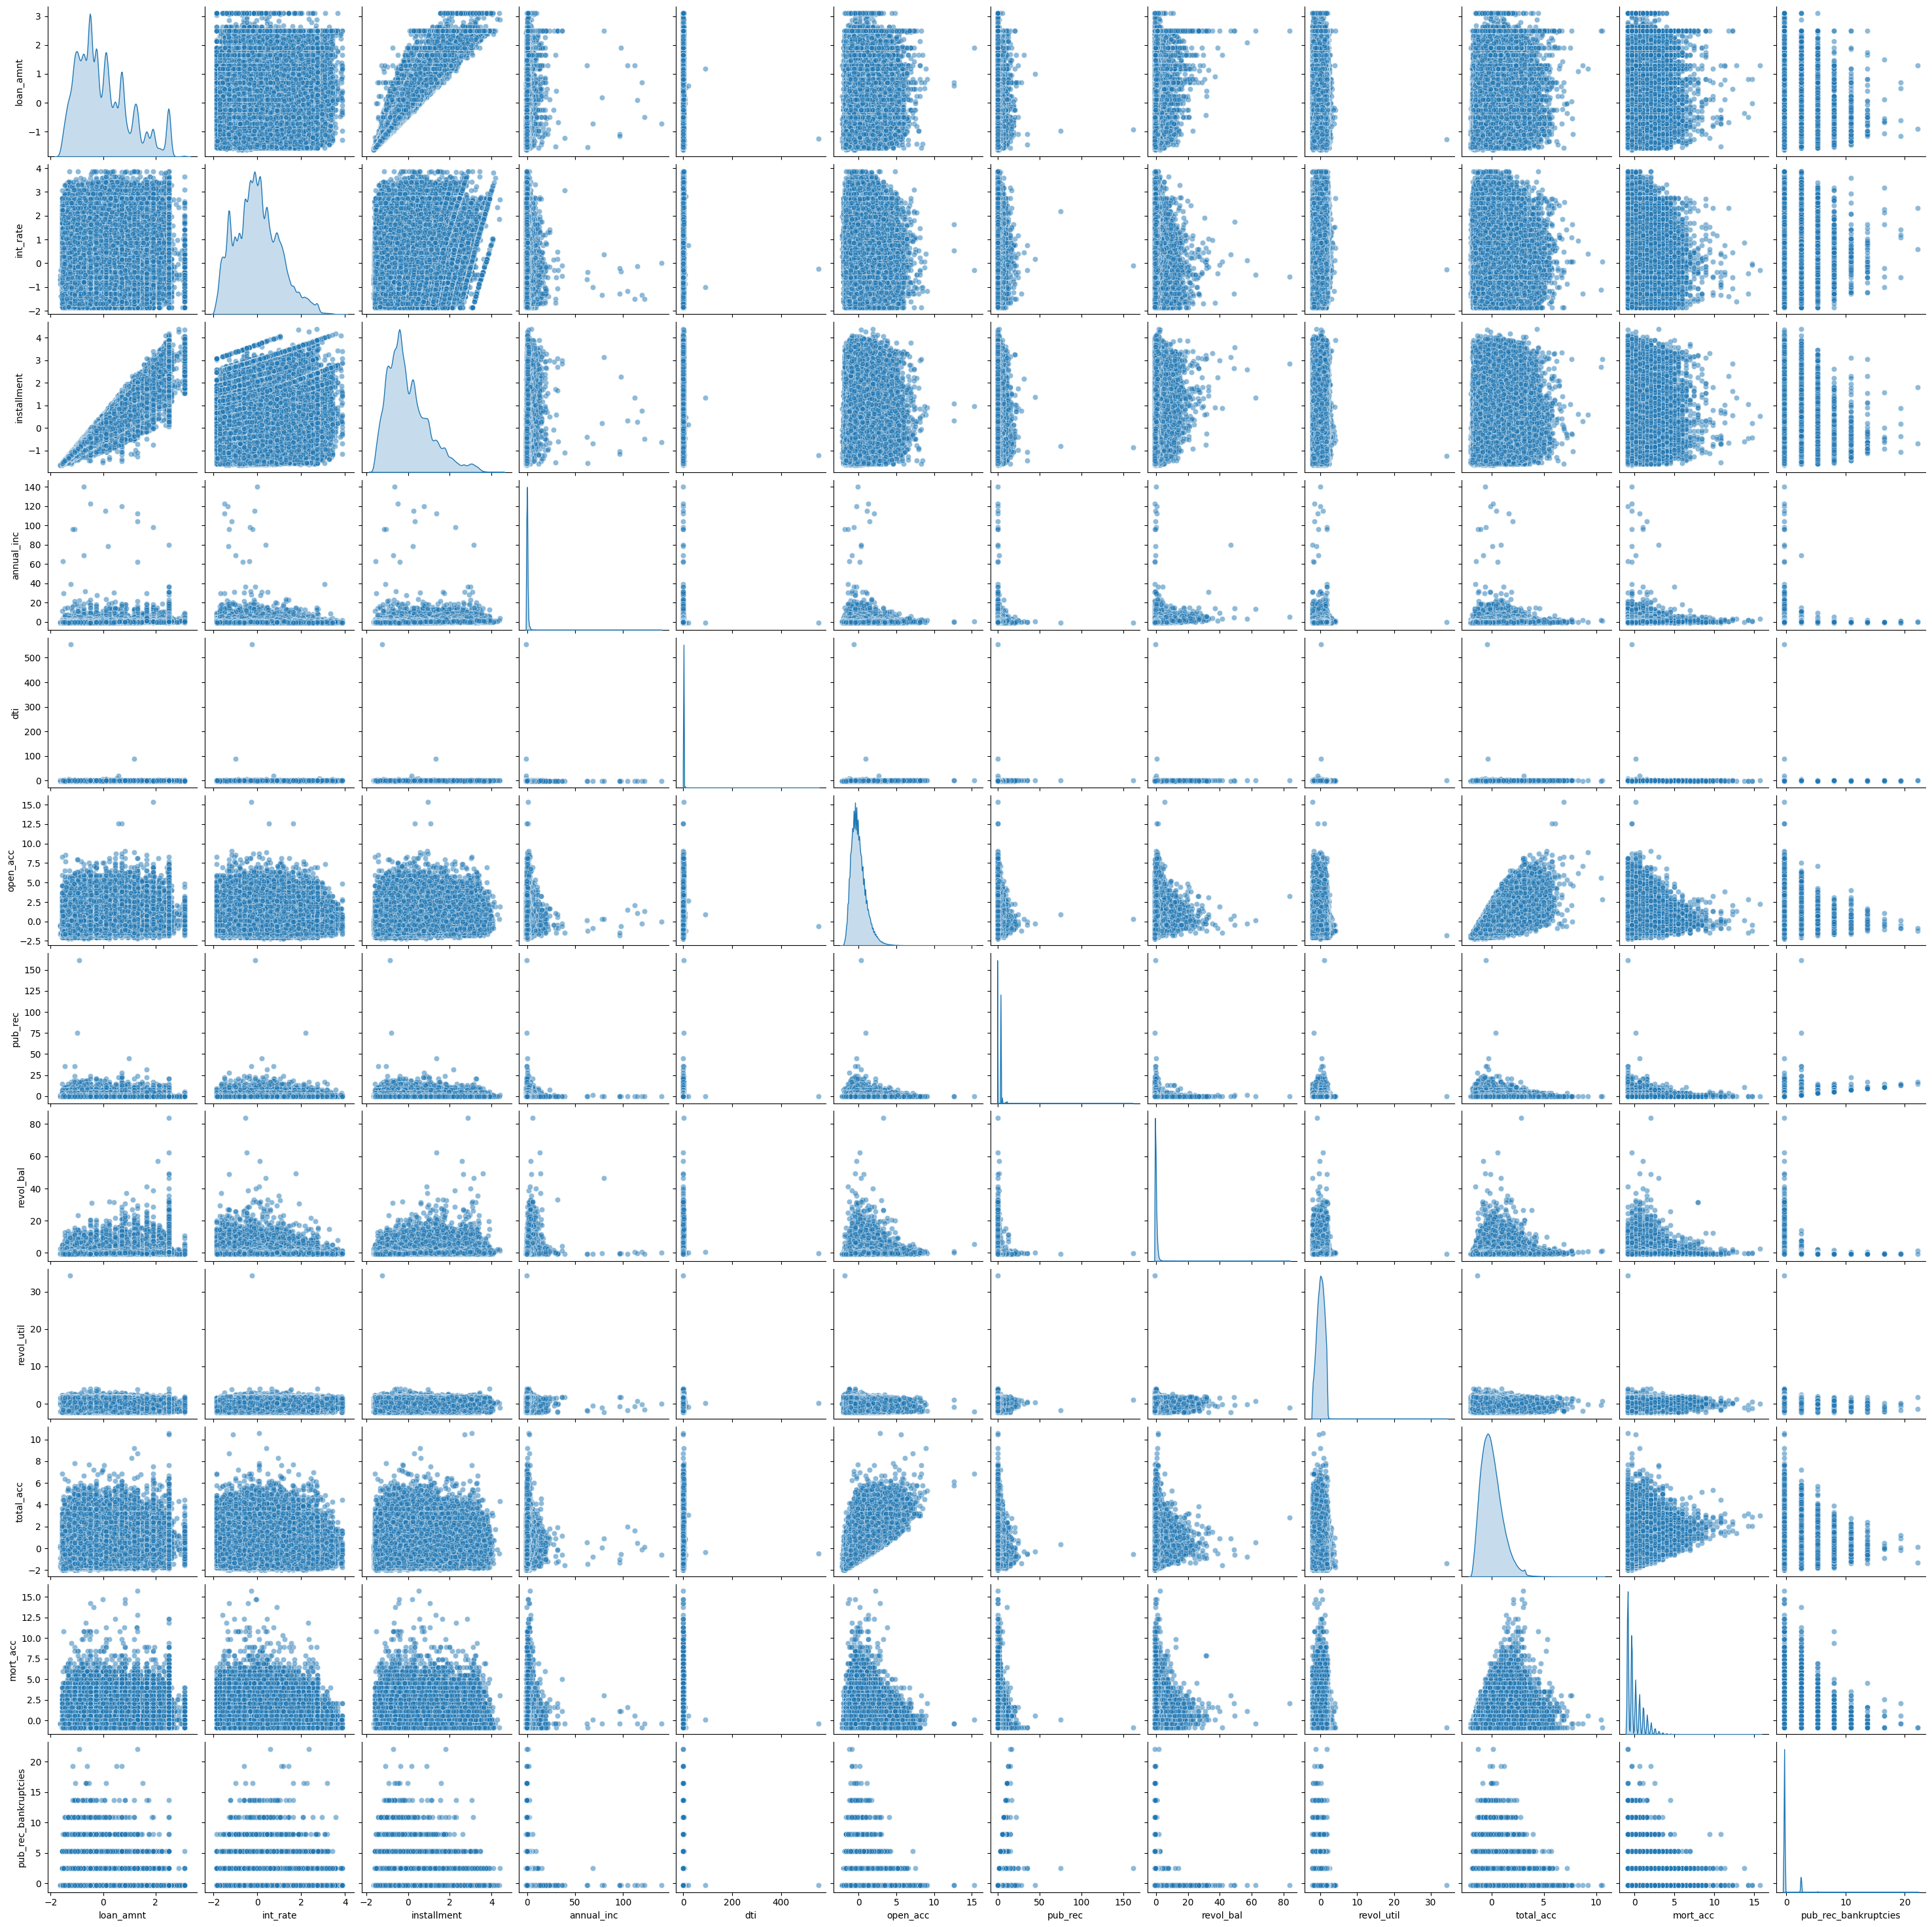

In [ ]:
sns.pairplot(df_standardised[numerical_values], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()


## centrer les données

In [ ]:
df_mean=np.mean(df_standardised)
df_centered=df_standardised-df_mean
print(df_centered)

        loan_amnt      term  int_rate  installment     grade  sub_grade  \
0       -0.492243 -0.557975 -0.491799    -0.408291 -0.616534   0.730895   
1       -0.731551 -0.557975 -0.368816    -0.662750 -0.616534   1.441742   
2        0.177819 -0.557975 -0.704225     0.299609 -0.616534   0.020048   
3       -0.827274 -0.557975 -1.598649    -0.842348 -1.366267  -0.690800   
4        1.227783  1.792196  0.811824     0.707861  0.133200   1.441742   
...           ...       ...       ...          ...       ...        ...   
396025  -0.492243  1.792196 -0.592422    -0.855390 -0.616534   0.730895   
396026   0.823951 -0.557975 -0.301734     1.071164  0.133200  -1.401647   
396027  -1.090513 -0.557975 -0.816028    -1.078979 -0.616534  -1.401647   
396028   0.823951  1.792196  0.373556     0.283855  0.133200  -0.690800   
396029  -1.449475 -0.557975 -0.006574    -1.451256  0.133200  -0.690800   

        emp_title  emp_length  annual_inc  loan_status  ...  \
0       -0.194317    1.058091    0.6

NB : ce n est pas necessaire de centrer les données car elle ont ete deja standardiser donc les centrer est superflu (ne change rien )

## calcul la matrice de covariance

In [ ]:
cov_matrix=np.cov(df_centered.T)
print('matrice de covariance : \n',cov_matrix)


matrice de covariance : 
 [[ 1.00000253e+00  3.93862719e-01  1.68921512e-01 ... -4.13072168e-03
  -1.46779139e-02  2.23670269e-02]
 [ 3.93862719e-01  1.00000253e+00  4.34594700e-01 ...  2.23076700e-03
  -1.33446361e-02  1.54237230e-02]
 [ 1.68921512e-01  4.34594700e-01  1.00000253e+00 ...  3.83369193e-02
  -3.15164414e-02  9.29488319e-03]
 ...
 [-4.13072168e-03  2.23076700e-03  3.83369193e-02 ...  1.00000253e+00
  -6.33893046e-01 -8.81131085e-04]
 [-1.46779139e-02 -1.33446361e-02 -3.15164414e-02 ... -6.33893046e-01
   1.00000253e+00 -7.72865141e-01]
 [ 2.23670269e-02  1.54237230e-02  9.29488319e-03 ... -8.81131085e-04
  -7.72865141e-01  1.00000253e+00]]


## valeur propre et vecteur propre

In [ ]:
eigvals, eigvects = np.linalg.eig(cov_matrix)
print('valeurs propres : \n', eigvals)
print('vecteurs propres : \n', eigvects)

valeurs propres : 
 [ 3.77062764e+00  2.82819938e+00  2.08001077e+00  1.95895748e+00
  1.88405657e+00  8.63489391e-03  2.18234494e-02  1.51753041e+00
  2.49498152e-01  2.99949746e-01  1.46232214e+00  4.32812828e-01
  4.80975275e-01  1.36978044e+00  5.86221097e-01  6.28168360e-01
  6.81097031e-01  7.05636810e-01  7.27606287e-01  7.54573176e-01
  1.25050873e+00  1.20149316e+00  8.50118452e-01  1.14866923e+00
  1.12743923e+00  9.25076799e-01  1.07514422e+00  9.48522828e-01
  9.79757861e-01  1.02651461e+00  1.01979883e+00  9.97734880e-01
  9.98522168e-01  1.00139136e+00  1.00092165e+00  3.44181393e-15
  2.47983565e-15 -5.62041716e-16]
vecteurs propres : 
 [[-4.00676019e-01  7.94082984e-02 -9.44925428e-02 ... -1.62077344e-14
   1.58592440e-14 -3.23712392e-15]
 [-2.22441287e-01  2.60187154e-01 -8.12971365e-03 ...  5.32982394e-15
  -4.72767590e-15  6.04163833e-16]
 [-1.35257542e-01  4.88285873e-01 -4.54103882e-02 ... -1.01962962e-15
   1.87271971e-15 -6.59069359e-15]
 ...
 [-1.62106073e-02  4

projection dans le nouvelles espace

In [ ]:
sorted_indices =  np.argsort(eigvals)[::-1]
eigvects = eigvects[:,sorted_indices]
eigvals = eigvals[sorted_indices]

In [ ]:
print(eigvals)

[ 3.77062764e+00  2.82819938e+00  2.08001077e+00  1.95895748e+00
  1.88405657e+00  1.51753041e+00  1.46232214e+00  1.36978044e+00
  1.25050873e+00  1.20149316e+00  1.14866923e+00  1.12743923e+00
  1.07514422e+00  1.02651461e+00  1.01979883e+00  1.00139136e+00
  1.00092165e+00  9.98522168e-01  9.97734880e-01  9.79757861e-01
  9.48522828e-01  9.25076799e-01  8.50118452e-01  7.54573176e-01
  7.27606287e-01  7.05636810e-01  6.81097031e-01  6.28168360e-01
  5.86221097e-01  4.80975275e-01  4.32812828e-01  2.99949746e-01
  2.49498152e-01  2.18234494e-02  8.63489391e-03  3.44181393e-15
  2.47983565e-15 -5.62041716e-16]


In [ ]:
#on va projeter en utilisant le vecteur propre correspondant au la plus grande valeur propre
principal_axis = eigvects[:,0]
print("Premier axe principal : \n",principal_axis)
X_pca=df_centered @ principal_axis
print('Données projetées : \n',X_pca)


Premier axe principal : 
 [-4.00676019e-01 -2.22441287e-01 -1.35257542e-01 -3.72397183e-01
 -1.40534911e-01 -6.20938642e-03  1.04879038e-02 -1.31283035e-01
 -2.24709950e-01  4.55577292e-02  8.49422559e-02  9.38666555e-02
 -5.37270065e-02 -2.24975328e-01  1.21850614e-02 -2.49272994e-01
 -8.29870467e-02 -2.70643494e-01 -7.70534073e-02 -2.64520352e-01
  2.41753849e-02 -1.41427859e-02  7.90097242e-04 -2.54591965e-01
  3.27666467e-04  7.76198989e-03  1.59945010e-02  2.49622272e-01
  2.19689514e-01 -3.66825283e-02 -1.77616452e-01 -1.21126908e-01
  1.93861249e-02  1.70565518e-01  1.02368571e-02 -1.62106073e-02
  3.00127937e-02 -2.55047991e-02]
Données projetées : 
 0         1.250264
1         0.424714
2         1.017010
3         3.463563
4        -2.858298
            ...   
396025    1.733197
396026   -0.909869
396027    1.473214
396028   -1.947468
396029    2.559286
Length: 396030, dtype: float64


In [ ]:
#comparaison  avec celui obtenue avec le pca avec sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca_sk = pca.fit_transform(df_standardised)
print(" avec sklearn : \n", pca_sk)


Scores avec sklearn : 
 [[-1.25026354]
 [-0.42471447]
 [-1.01701041]
 ...
 [-1.47321432]
 [ 1.94746793]
 [-2.55928554]]


pour optimiser on va dertermimer le nombre de vecteurs propres a conserver

In [ ]:
var_t_e_c=0.95
#variance expliquer
var_e=eigvals / np.sum(eigvals)
#variance cumuler
var_e_c=np.cumsum(var_e)
# trouver k
k=np.argmax(var_e_c >= var_t_e_c) +1
print(f"le nombre optimal de vecteurs propres pour garder une variance de {var_t_e_c} est : {k}")


le nombre optimal de vecteurs propres pour garder une variance de 0.95 est : 29


In [ ]:
#on va projeter en utilisant le vecteur propre correspondant au la plus grande valeur propre
principal_axis1 = eigvects[:,0:29]
print("Premier axe principal : \n",principal_axis1)
X_pca1=df_centered @ principal_axis1
print('Données projetées : \n',X_pca1)

Premier axe principal : 
 [[-4.00676019e-01  7.94082984e-02 -9.44925428e-02 ... -3.77541884e-02
   3.83201551e-02  4.95689761e-02]
 [-2.22441287e-01  2.60187154e-01 -8.12971365e-03 ...  3.82777925e-01
  -1.65558958e-01  1.79781561e-01]
 [-1.35257542e-01  4.88285873e-01 -4.54103882e-02 ... -9.20800019e-02
   6.67368318e-02 -8.91590960e-02]
 ...
 [-1.62106073e-02  4.53868644e-02  2.98935287e-01 ... -2.97602805e-03
  -1.13313482e-02  8.45211825e-03]
 [ 3.00127937e-02 -5.31371006e-02 -4.72933132e-01 ... -4.58274612e-03
   2.72980095e-03 -2.84627256e-04]
 [-2.55047991e-02  3.14651183e-02  3.66212456e-01 ...  8.36703662e-03
   5.76756797e-03 -6.56673333e-03]]
Données projetées : 
               0         1         2         3         4         5         6   \
0       1.250264 -0.893040 -0.060355 -0.411296  0.176349  0.887657  1.080984   
1       0.424714 -1.895912  0.422685 -0.234941 -0.395768 -0.398602  1.403619   
2       1.017010  0.776011  0.547626  0.225465 -2.835305 -0.072631 -0.390707

In [ ]:
#comparaison avec celui obtenue avec le pca avec sklearn
from sklearn.decomposition import PCA

pca1 = PCA(n_components=k)
pca_sk1 = pca1.fit_transform(df_standardised)
print(" avec sklearn : \n", pca_sk1)


Scores avec sklearn : 
 [[-1.25026354 -0.89303986  0.06035537 ... -0.52142319 -1.00421011
  -0.18162267]
 [-0.42471447 -1.89591224 -0.42268458 ... -0.10874919  0.04110824
   0.44646042]
 [-1.01701041  0.77601146 -0.54762566 ...  0.27629658  0.0540365
   0.10863013]
 ...
 [-1.47321432 -0.13945579  1.36898265 ... -1.71002409  1.28552069
   0.22198791]
 [ 1.94746793 -0.10515762  1.57104213 ... -0.31494641  0.66839235
   0.72033149]
 [-2.55928554  0.95346206  2.0197761  ... -0.44664181  1.70987993
  -0.17306207]]
